In [2]:
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as st
pd.options.mode.chained_assignment = None  # default='warn'

# Store filepath in a variable
file = Path("Resources/NewYorkAirBnB.csv")
file_df = pd.read_csv(file)
file_df.head()

,id,host_id,host_name,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,...,bedrooms,beds,price,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,8.017500e+17,495455523,Michael,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,...,1.0,1.0,$143.00,0,NaN,NaN,NaN,NaN,NaN,NaN
1,7.659490e+17,488760226,Eric,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,...,1.0,1.0,$30.00,13,4.77,4.77,4.85,4.92,4.85,4.92
2,6.362740e+17,461263600,Tommaso,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,...,2.0,2.0,$157.00,0,NaN,NaN,NaN,NaN,NaN,NaN
3,7.681250e+17,475699129,Suliman,Sheepshead Bay,Brooklyn,40.583490,-73.959880,Private room in home,Private room,2,...,3.0,1.0,$89.00,15,5.00,4.87,5.00,5.00,5.00,5.00
4,4.924826e+07,397288055,Katherine,North Riverdale,Bronx,40.903260,-73.907090,Entire rental unit,Entire home/apt,3,...,2.0,2.0,$125.00,25,4.56,4.44,4.72,4.88,4.72,4.64


In [3]:
# Copy and clean initial df for size comparisons
size_df = file_df[["id", "host_id", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "bathrooms_text",
                   "bedrooms", "beds", "price", "number_of_reviews"]].copy()

# Split bathroom data to enable use as int, get rid of extra columns
size_df[["baths", "shared", "bath"]] = size_df.bathrooms_text.str.split(" ", expand=True)
size_df["baths"] = size_df["baths"].replace("Half-bath", "0.5")
size_df["baths"] = size_df["baths"].replace("Private", "0.5")
size_df["baths"] = size_df["baths"].replace("Shared", "0.5")

size_df["baths"] = size_df["baths"].astype(float)
size_df = size_df[["id", "host_id", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "baths", "bedrooms",
                   "beds", "price", "number_of_reviews"]]

size_df.columns = ["ID", "Host ID", "Neighborhood", "Borough", "Property Type", "Room Type", "Capacity", "Baths", "Bedrooms",
                        "Beds", "Price", "Number of Reviews"]
size_df

,ID,Host ID,Neighborhood,Borough,Property Type,Room Type,Capacity,Baths,Bedrooms,Beds,Price,Number of Reviews
0,8.017500e+17,495455523,Canarsie,Brooklyn,Private room in home,Private room,2,1.0,1.0,1.0,$143.00,0
1,7.659490e+17,488760226,Canarsie,Brooklyn,Private room in rental unit,Private room,1,1.0,1.0,1.0,$30.00,13
2,6.362740e+17,461263600,Tottenville,Staten Island,Entire villa,Entire home/apt,6,2.0,2.0,2.0,$157.00,0
3,7.681250e+17,475699129,Sheepshead Bay,Brooklyn,Private room in home,Private room,2,2.0,3.0,1.0,$89.00,15
4,4.924826e+07,397288055,North Riverdale,Bronx,Entire rental unit,Entire home/apt,3,1.0,2.0,2.0,$125.00,25
...,...,...,...,...,...,...,...,...,...,...,...,...
42926,4.034290e+07,90429772,East Village,Manhattan,Private room in rental unit,Private room,1,1.0,1.0,1.0,$85.00,0
42927,3.525770e+07,264962468,Hell's Kitchen,Manhattan,Entire rental unit,Entire home/apt,6,1.0,2.0,3.0,$208.00,217
42928,5.249152e+07,305489297,Lower East Side,Manhattan,Entire rental unit,Entire home/apt,3,1.0,3.0,3.0,$125.00,7
42929,4.815880e+07,6600525,Bushwick,Brooklyn,Private room in loft,Private room,1,2.0,6.0,1.0,$50.00,0


In [4]:
# Each unit capacity and their total values
cap_counts = size_df["Capacity"].value_counts()
cap_counts

2     19015
4      6835
1      6775
3      4083
6      2287
5      1769
8       790
7       464
16      246
10      234
12      203
9        95
15       37
11       36
13       23
14       23
0        16
Name: Capacity, dtype: int64

In [5]:
# Each unit property type and their total values
type_counts = size_df["Property Type"].value_counts()
type_counts

Entire rental unit                  18010
Private room in rental unit         11493
Private room in home                 2396
Entire home                          1727
Entire condo                         1645
                                    ...  
Shared room in bed and breakfast        1
Private room in kezhan                  1
Private room in floor                   1
Entire bed and breakfast                1
Private room in dorm                    1
Name: Property Type, Length: 80, dtype: int64

In [6]:
# Price summary stats dataframe by borough
size_df["Price"] = size_df["Price"].str.replace("$", "")
size_df["Price"] = size_df["Price"].str.replace(",", "")
size_df["Price"] = size_df["Price"].astype(float)

borough_mean = size_df.groupby(["Borough"]).mean(numeric_only=True)
borough_med = size_df.groupby(["Borough"]).median(numeric_only=True)
borough_var = size_df.groupby(["Borough"]).var(numeric_only=True)
borough_std = size_df.groupby(["Borough"]).std(numeric_only=True)
borough_sem = size_df.groupby(["Borough"]).sem(numeric_only=True)

borough_stats = pd.DataFrame({"Mean Price":borough_mean["Price"], "Median Price":borough_med["Price"], "Price Variance":borough_var["Price"],
                                "Price Std Dev":borough_std["Price"], "Price Std Err":borough_sem["Price"]})

borough_stats

C:\Users\jdaiu\AppData\Local\Temp\ipykernel_14636\1396221645.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  size_df["Price"] = size_df["Price"].str.replace("$", "")


,Mean Price,Median Price,Price Variance,Price Std Dev,Price Std Err
Borough,,,,,
Bronx,117.512123,87.0,6.906956e+04,262.810878,6.391040
Brooklyn,162.766829,110.0,1.088101e+06,1043.120669,8.186187
Manhattan,268.365783,165.0,6.517626e+05,807.318180,6.075387
Queens,128.173655,90.0,9.470758e+04,307.745972,3.700538
Staten Island,309.037296,99.0,1.002534e+07,3166.281483,152.869511


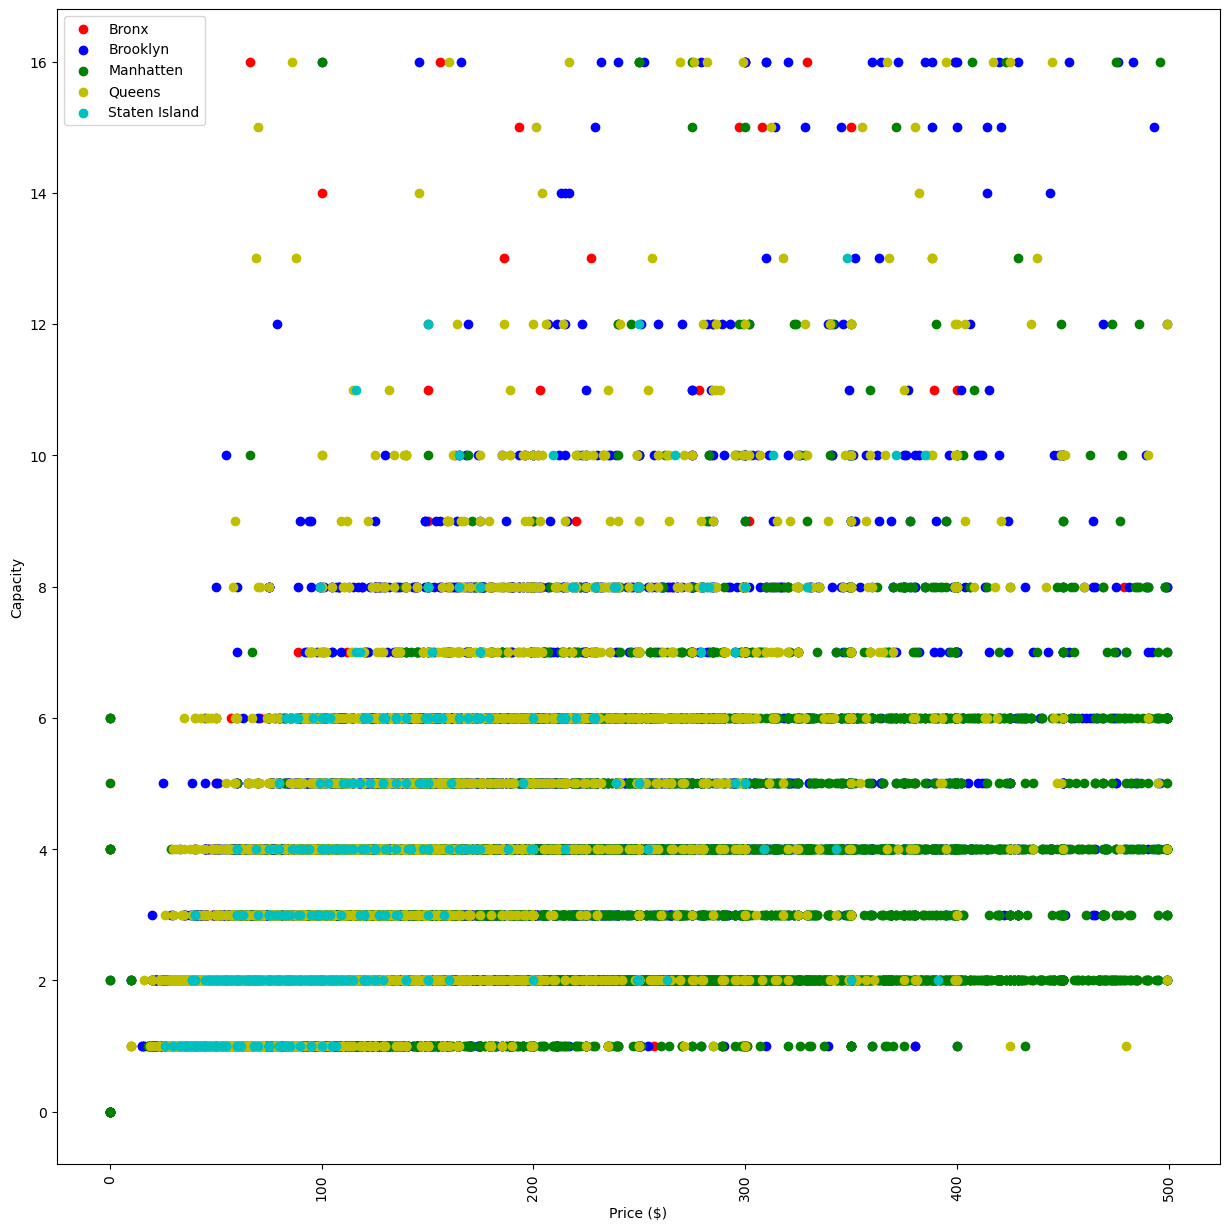

In [7]:
# Scatter plot of Price of Unit vs. Capacity across all boroughs with price limited at $550
size_no_outliers = size_df[size_df["Price"] < 500]

bronx_df = size_no_outliers[(size_no_outliers["Borough"] == "Bronx")]
brooklyn_df = size_no_outliers[(size_no_outliers["Borough"] == "Brooklyn")]
manhattan_df = size_no_outliers[(size_no_outliers["Borough"] == "Manhattan")]
queens_df = size_no_outliers[(size_no_outliers["Borough"] == "Queens")]
staten_df = size_no_outliers[(size_no_outliers["Borough"] == "Staten Island")]

bronx_x = bronx_df["Price"]
bronx_y = bronx_df["Capacity"]
brooklyn_x = brooklyn_df["Price"]
brooklyn_y = brooklyn_df["Capacity"]
manhattan_x = manhattan_df["Price"]
manhattan_y = manhattan_df["Capacity"]
queens_x = queens_df["Price"]
queens_y = queens_df["Capacity"]
staten_x = staten_df["Price"]
staten_y = staten_df["Capacity"]

plt.figure(figsize=(15,15))
plt.scatter(bronx_x, bronx_y, color="r", label="Bronx")
plt.scatter(brooklyn_x, brooklyn_y, color="b", label="Brooklyn")
plt.scatter(manhattan_x, manhattan_y, color="g", label="Manhatten")
plt.scatter(queens_x, queens_y, color="y", label="Queens")
plt.scatter(staten_x, staten_y, color="c", label="Staten Island")
plt.xlabel("Price ($)")
plt.ylabel("Capacity")
plt.xticks(rotation=90)
plt.legend(loc="upper left")

plt.show()

In [8]:
# Summary stats dataframe of capacities by neighborhoods in the Bronx
bronx_df["Price"] = bronx_df["Price"].astype(float)

hood_mean = bronx_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = bronx_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = bronx_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = bronx_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = bronx_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Allerton,3.725490,3.0,7.883137,2.807693,0.393156
Baychester,3.358974,2.0,3.657220,1.912386,0.306227
Belmont,2.744186,2.0,2.433001,1.559808,0.237868
Bronxdale,2.269231,2.0,1.404615,1.185165,0.232430
Castle Hill,3.875000,4.0,2.410714,1.552648,0.548944
City Island,3.230769,2.0,3.525641,1.877669,0.520772
Claremont Village,2.594595,2.0,3.414414,1.847813,0.303779
Clason Point,2.538462,2.0,1.939668,1.392720,0.193135
Co-op City,1.500000,1.5,0.333333,0.577350,0.288675


In [9]:
# Summary stats dataframe of capacities by neighborhoods in Brooklyn
brooklyn_df["Price"] = brooklyn_df["Price"].astype(float)

hood_mean = brooklyn_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = brooklyn_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = brooklyn_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = brooklyn_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = brooklyn_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Bath Beach,2.714286,2.0,1.841270,1.356934,0.256436
Bay Ridge,2.768707,2.0,6.055726,2.460839,0.202967
Bedford-Stuyvesant,2.816380,2.0,3.536805,1.880639,0.034177
Bensonhurst,2.987654,2.0,3.987346,1.996834,0.221870
Bergen Beach,4.476190,4.0,6.561905,2.561622,0.558992
Boerum Hill,2.868852,2.0,2.230592,1.493517,0.135217
Borough Park,2.336957,2.0,1.654443,1.286252,0.134101
Brighton Beach,2.534247,2.0,1.752283,1.323738,0.154932
Brooklyn Heights,2.719101,2.0,1.863381,1.365057,0.144696


In [10]:
# Summary stats dataframe of capacities by neighborhoods in Manhattan
manhattan_df["Price"] = manhattan_df["Price"].astype(float)

hood_mean = manhattan_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = manhattan_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = manhattan_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = manhattan_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = manhattan_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Battery Park City,2.794521,2.0,2.082192,1.442980,0.168888
Chelsea,2.514628,2.0,1.424553,1.193546,0.043524
Chinatown,2.495968,2.0,1.910915,1.382358,0.087780
Civic Center,2.896552,2.0,1.953202,1.397570,0.259522
East Harlem,2.802867,2.0,2.802001,1.673918,0.057859
East Village,2.468551,2.0,1.825880,1.351251,0.040797
Financial District,2.805019,2.0,1.832315,1.353630,0.059475
Flatiron District,2.436893,2.0,1.091567,1.044781,0.102945
Gramercy,2.472222,2.0,1.264341,1.124429,0.076508


In [11]:
# Summary stats dataframe of capacities by neighborhoods in Queens
queens_df["Price"] = queens_df["Price"].astype(float)

hood_mean = queens_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = queens_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = queens_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = queens_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = queens_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Arverne,4.100917,4.0,6.387870,2.527423,0.242083
Astoria,2.519841,2.0,2.599606,1.612329,0.058640
Bay Terrace,3.600000,4.0,6.300000,2.509980,1.122497
Bayside,3.123288,2.0,5.109589,2.260440,0.264564
Bayswater,2.590909,2.0,2.824675,1.680677,0.358322
Belle Harbor,5.000000,5.0,5.000000,2.236068,0.745356
Bellerose,3.818182,3.5,6.727273,2.593699,0.552978
Breezy Point,2.000000,2.0,0.000000,0.000000,0.000000
Briarwood,3.250000,2.0,5.833333,2.415229,0.381881


In [12]:
# Summary stats dataframe of capacities by neighborhoods in Staten Island
staten_df["Price"] = staten_df["Price"].astype(float)

hood_mean = staten_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = staten_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = staten_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = staten_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = staten_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Capacity":hood_mean["Capacity"], "Median Capacity":hood_med["Capacity"], "Capacity Variance":hood_var["Capacity"],
                                "Capacity Std Dev":hood_std["Capacity"], "Capacity Std Err":hood_sem["Capacity"]})

hood_stats

,Mean Capacity,Median Capacity,Capacity Variance,Capacity Std Dev,Capacity Std Err
Neighborhood,,,,,
Arden Heights,3.000000,3.0,3.333333,1.825742,0.912871
Arrochar,3.214286,2.5,3.565934,1.888368,0.504688
Bull's Head,3.666667,3.5,5.866667,2.422120,0.988826
Castleton Corners,3.285714,2.0,5.571429,2.360387,0.892143
"Chelsea, Staten Island",3.000000,3.0,2.000000,1.414214,1.000000
Clifton,3.833333,2.5,7.060606,2.657180,0.767062
Concord,2.900000,3.0,1.433333,1.197219,0.378594
Dongan Hills,5.428571,6.0,5.285714,2.299068,0.868966
Eltingville,3.750000,4.0,0.250000,0.500000,0.250000


In [13]:
#Count how many reservations were made in each borough
file_df['neighbourhood_group_cleansed'].value_counts()

Manhattan        17658
Brooklyn         16237
Queens            6916
Bronx             1691
Staten Island      429
Name: neighbourhood_group_cleansed, dtype: int64

In [14]:
# Summary stats dataframe for every neighborhood just for fun
size_df["Price"] = size_df["Price"].astype(float)

hood_mean = size_df.groupby(["Neighborhood"]).mean(numeric_only=True)
hood_med = size_df.groupby(["Neighborhood"]).median(numeric_only=True)
hood_var = size_df.groupby(["Neighborhood"]).var(numeric_only=True)
hood_std = size_df.groupby(["Neighborhood"]).std(numeric_only=True)
hood_sem = size_df.groupby(["Neighborhood"]).sem(numeric_only=True)

hood_stats = pd.DataFrame({"Mean Price":hood_mean["Price"], "Median Price":hood_med["Price"], "Price Variance":hood_var["Price"],
                                "Price Std Dev":hood_std["Price"], "Price Std Err":hood_sem["Price"]})

hood_stats

,Mean Price,Median Price,Price Variance,Price Std Dev,Price Std Err
Neighborhood,,,,,
Allerton,121.547170,99.0,9148.906386,95.649916,13.138526
Arden Heights,89.750000,95.0,1452.916667,38.117144,19.058572
Arrochar,129.214286,104.5,6947.258242,83.350214,22.276282
Arverne,191.406780,132.0,32553.200637,180.425055,16.609473
Astoria,111.283093,85.0,8773.108730,93.664875,3.390896
...,...,...,...,...,...
Windsor Terrace,167.621622,139.0,17682.364619,132.975053,12.621433
Woodhaven,89.865979,72.0,3385.950601,58.188922,5.908190
Woodlawn,127.500000,88.5,9395.961538,96.932768,25.906372


In [15]:
# ANOVA test using medians (because of the skewdness of the data)
# H0: The median prices of units is the same between boroughs.
# H1: there will be at least one median that differs from the rest.

bronx_price = bronx_df["Price"]
brooklyn_price = brooklyn_df["Price"]
manhattan_price = manhattan_df["Price"]
queens_price = queens_df["Price"]
staten_price = staten_df["Price"]

st.f_oneway(bronx_price, brooklyn_price, manhattan_price, queens_price, staten_price)

F_onewayResult(statistic=992.9424254940104, pvalue=0.0)

In [ ]:
# ANOVA test provides statistical proof that there is a difference in price between the five boroughs.